<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.1-显示原图" data-toc-modified-id="1.1-显示原图-1">1.1 显示原图</a></span></li><li><span><a href="#2-SVD奇异值分解" data-toc-modified-id="2-SVD奇异值分解-2">2 SVD奇异值分解</a></span></li><li><span><a href="#3.1-奇异值数量为原有的1%时，输出重构后的图像" data-toc-modified-id="3.1-奇异值数量为原有的1%时，输出重构后的图像-3">3.1 奇异值数量为原有的1%时，输出重构后的图像</a></span></li><li><span><a href="#3.2-奇异值数量为原有的10%时，输出重构后的图像" data-toc-modified-id="3.2-奇异值数量为原有的10%时，输出重构后的图像-4">3.2 奇异值数量为原有的10%时，输出重构后的图像</a></span></li><li><span><a href="#3.3-奇异值数量为原有的50%时，输出重构后的图像" data-toc-modified-id="3.3-奇异值数量为原有的50%时，输出重构后的图像-5">3.3 奇异值数量为原有的50%时，输出重构后的图像</a></span></li><li><span><a href="#4.1-对通道1进行奇异值分解" data-toc-modified-id="4.1-对通道1进行奇异值分解-6">4.1 对通道1进行奇异值分解</a></span></li><li><span><a href="#4.2-对通道2进行奇异值分解" data-toc-modified-id="4.2-对通道2进行奇异值分解-7">4.2 对通道2进行奇异值分解</a></span></li><li><span><a href="#4.3-对通道3进行奇异值分解" data-toc-modified-id="4.3-对通道3进行奇异值分解-8">4.3 对通道3进行奇异值分解</a></span></li><li><span><a href="#4.4-恢复为3通道" data-toc-modified-id="4.4-恢复为3通道-9">4.4 恢复为3通道</a></span><ul class="toc-item"><li><span><a href="#4.4.1-叠加为3维，并输出到本地" data-toc-modified-id="4.4.1-叠加为3维，并输出到本地-9.1">4.4.1 叠加为3维，并输出到本地</a></span></li><li><span><a href="#4.4.2-获取图片分解前后的物理大小" data-toc-modified-id="4.4.2-获取图片分解前后的物理大小-9.2">4.4.2 获取图片分解前后的物理大小</a></span></li></ul></li></ul></div>

Action1要求：    
选择任意一张图片，对其进行灰度化，然后使用SVD进行图像的重构，当奇异值数量为原有的1%，10%，50%时，输出重构后的图像

In [1]:
import numpy as np
from PIL import Image
from scipy.linalg import svd # svd奇异值分解
from matplotlib import pyplot as plt

# 1 加载图片

In [2]:
img = Image.open("./origin_imge.jpg")

In [3]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [4]:
img.mode, img.size

('RGB', (4000, 3000))

In [5]:
im_gray = img.convert('L')

In [6]:
im_gray.mode

'L'

In [7]:
img_arr = np.array(img)

In [8]:
img_arr.shape

(3000, 4000, 3)

## 1.1 显示原图

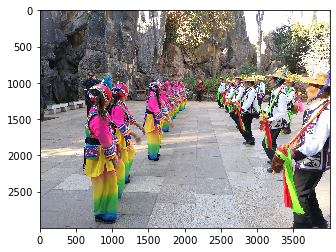

In [9]:
plt.imshow(img_arr, cmap=plt.cm.gray, interpolation='nearest')
plt.show()

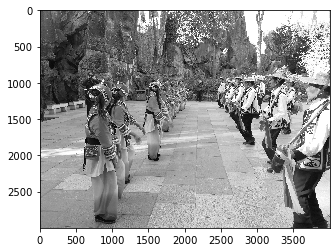

In [10]:
plt.imshow(im_gray, cmap=plt.cm.gray, interpolation='nearest')
plt.show()

In [11]:
im_gray_arr = np.array(im_gray)
im_gray_arr.shape

(3000, 4000)

## 2 SVD奇异值分解

In [12]:
p, s, q = svd(im_gray_arr, 
              full_matrices=False) #If False,the shapes are `(M, K)` and `(K, N)`,where `K = min(M, N)`

In [13]:
p.shape, s.shape, q.shape

((3000, 3000), (3000,), (3000, 4000))

# 3 取前K个特征，对图像进行还原

In [14]:
def get_image_feature(p, q, s, k):
    "取Top-k个特征对图像进行还原"
    temp_s = np.zeros(s.shape[0])
    temp_s[:k] = s[:k]
    s = temp_s * np.identity(s.shape[0])
    temp = np.dot(p, s)
    temp = np.dot(temp, q)
    plt.imshow(temp, cmap=plt.cm.gray, interpolation='nearest')
    plt.title("k=%d" % k)
    plt.axis('off')
    plt.show()
    print(np.square(im_gray_arr - temp).sum())

## 3.1 奇异值数量为原有的1%时，输出重构后的图像

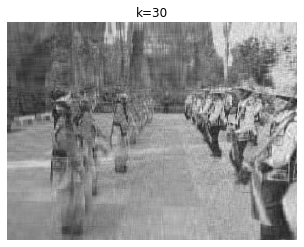

8062704928.600447


In [15]:
k = int(s.shape[0] * 0.01)
get_image_feature(p, q, s, k)

## 3.2 奇异值数量为原有的10%时，输出重构后的图像

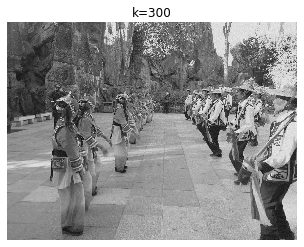

1528540034.0474455


In [16]:
k = int(s.shape[0] * 0.1)
get_image_feature(p, q, s, k)

## 3.3 奇异值数量为原有的50%时，输出重构后的图像

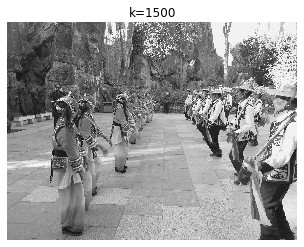

53195443.764418125


In [17]:
k = int(s.shape[0] * 0.5)
get_image_feature(p, q, s, k)

# 4 验证关于对图像3个通道分别进行奇异值分解可行性的猜想
群里有同学提到过想对RGB的图像进行奇异值分解，我的猜想是，是否能分别对3个通道的图像矩阵进行奇异值分解，最后取相同的k值得到的矩阵再重新叠加起来，看是否能实现既降低了维度，又能保留图像的足够多的信息。

In [18]:
# RGB即是代表红、绿、蓝三个通道的颜色
# 3通道原图像
img_arr.shape

(3000, 4000, 3)

In [19]:
channel1_arr = img_arr[:, :, 0]
channel2_arr = img_arr[:, :, 1]
channel3_arr = img_arr[:, :, 2]

In [20]:
channel1_arr

array([[ 92,  90,  90, ..., 186, 177, 178],
       [ 91,  90,  92, ..., 177, 179, 177],
       [ 90,  89,  92, ..., 199, 198, 199],
       ...,
       [132, 132, 131, ..., 157, 160, 158],
       [133, 132, 132, ..., 169, 171, 170],
       [132, 132, 132, ..., 180, 180, 181]], dtype=uint8)

In [21]:
channel2_arr

array([[ 92,  90,  90, ..., 168, 161, 162],
       [ 91,  90,  92, ..., 159, 161, 161],
       [ 90,  89,  92, ..., 181, 180, 183],
       ...,
       [136, 136, 135, ..., 151, 154, 152],
       [137, 136, 136, ..., 163, 165, 164],
       [136, 136, 136, ..., 174, 174, 175]], dtype=uint8)

In [22]:
channel3_arr

array([[102, 100, 100, ..., 156, 146, 147],
       [101, 100, 102, ..., 145, 147, 146],
       [100,  99, 102, ..., 167, 166, 167],
       ...,
       [145, 145, 144, ..., 155, 156, 154],
       [146, 145, 145, ..., 167, 167, 166],
       [145, 145, 145, ..., 178, 176, 177]], dtype=uint8)

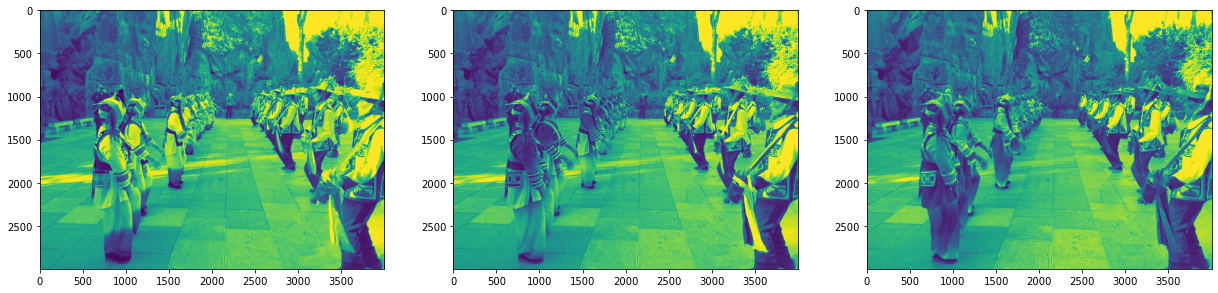

In [23]:
# 分别绘制3个通道的图像
f = plt.figure(figsize=(21, 8))
ax = plt.subplot(131)
ax.imshow(channel1_arr)
ax = plt.subplot(132)
ax.imshow(channel2_arr)
ax = plt.subplot(133)
ax.imshow(channel3_arr)
plt.show()

## 4.1 对通道1进行奇异值分解

In [24]:
p1, s1, q1 = svd(channel1_arr, full_matrices=False)

In [25]:
def get_image_feature(p, q, s, k):
    "取Top-k个特征对图像进行还原"
    temp_s = np.zeros(s.shape[0])
    temp_s[:k] = s[:k]
    s = temp_s * np.identity(s.shape[0])
    temp = np.dot(p, s)
    temp = np.dot(temp, q)
    return temp

In [26]:
k = int(s1.shape[0] * 0.5)
k

1500

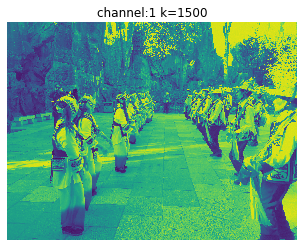

In [27]:
channel1 = get_image_feature(p1, q1, s1, k)
plt.imshow(channel1, interpolation='nearest')
plt.title("channel:1 k=%d" % k)
plt.axis('off')
plt.show()

## 4.2 对通道2进行奇异值分解

In [28]:
p2, s2, q2 = svd(channel2_arr, full_matrices=False)

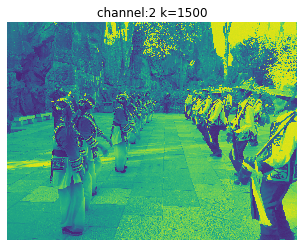

In [29]:
channel2 = get_image_feature(p2, q2, s2, k)
plt.imshow(channel2, interpolation='nearest')
plt.title("channel:2 k=%d" % k)
plt.axis('off')
plt.show()

## 4.3 对通道3进行奇异值分解

In [30]:
p3, s3, q3 = svd(channel3_arr, full_matrices=False)

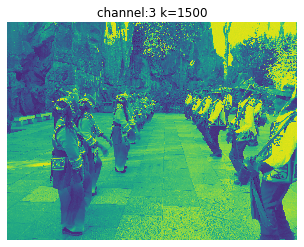

In [31]:
channel3 = get_image_feature(p3, q3, s3, k)
plt.imshow(channel3, interpolation='nearest')
plt.title("channel:3 k=%d" % k)
plt.axis('off')
plt.show()

## 4.4 恢复为3通道

### 4.4.1 叠加为3维，并输出到本地

In [32]:
# 扩展维度为3维
channel1 = np.expand_dims(channel1, axis=-1)
channel2 = np.expand_dims(channel2, axis=-1)
channel3 = np.expand_dims(channel3, axis=-1)

In [33]:
channel1.shape

(3000, 4000, 1)

In [34]:
# axis=2 方向合并
new_img = np.concatenate((channel1, channel2, channel3), axis=2)
new_img.shape

(3000, 4000, 3)

In [35]:
new_img.dtype

dtype('float64')

In [36]:
# RGB要求数组为整数类型，因此修改数组类型
new_img = np.uint8(new_img)
new_img.dtype

dtype('uint8')

In [37]:
new_img.min(), new_img.max()

(0, 255)

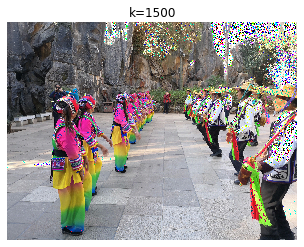

In [38]:
plt.imshow(new_img, interpolation='nearest')
plt.title("k=%d" % k)
plt.axis('off')
plt.show()

In [39]:
new_img_ = Image.fromarray(new_img)

In [40]:
new_img_.mode

'RGB'

In [41]:
new_img_.size

(4000, 3000)

In [42]:
new_img_.save('./new_img.jpg')

### 4.4.2 获取图片分解前后的物理大小

In [61]:
import os

In [63]:
os.path.getsize('./origin_imge.jpg')

5084801

In [64]:
os.path.getsize('./new_img.jpg')

2517019

原本图片是5.1M，SVD后的新图片的大小为2.5M，新图片除了强光下的白色部分有些失真，大部分图像信息都被保留了。说明这种猜想可行。

# 5 总结：

- 分别对一个原图大小为71kb的图片和5.1M的图片进行过测试：
    - 当对已经很小的71kb的图像进行奇异值分解后，得到的新图像物理大小并没有变化，也是71kb；
    - 而对5.1M的图片进行奇异值分解后，得到的新图像物理大小减小了一半，但图像保留了大部分信息。